In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning

# Suppress specific sklearn warnings to keep notebook output clean and readable.
# ⚠️ These warnings often appear during hyperparameter tuning (GridSearchCV / RandomizedSearchCV)
# because:
#   • some parameter combinations may not converge within max_iter  → ConvergenceWarning
#   • some combinations are invalid for certain solvers  → FitFailedWarning
#
# These warnings do NOT stop the execution — sklearn automatically skips the failed fits
# and continues evaluating other parameter combinations.
#
# Since we already understand the causes and Grid/Random Search is expected to try
# many combinations (including failing ones), suppressing these warnings prevents
# long cluttered outputs while keeping the important results visible.
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)
# Suppress warnings to keep the notebook output clean.
# FutureWarning  → comes from features that will be deprecated in future versions of libraries.
# UserWarning    → general warnings raised by libraries during execution.
#
# We ignore these ONLY to avoid cluttered output during model experimentation.
# Core errors will still be shown — only warnings are muted.
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


### 🔰 Notation Used in This Notebook

In Linear Models, the hypothesis (prediction function) is traditionally written as:

$$
y(x) = mx + c
$$

However, in Machine Learning — especially for **Logistic Regression and Linear Regression** — we use **vectorized parameter notation**:

$$
h_\theta(x) = \theta_0 + \theta_1 x_1
$$

where  
- $ \theta_0 $ → intercept / bias term  
- $ \theta_1 $ → weight associated with feature $ x_1 $

This notation makes the model easier to **extend to multiple features (dimensions)** and **express in matrix form** later.


---



# 🔹 Logistic Regression — Binary Classification

Logistic Regression is a supervised machine learning algorithm used when the **target variable has only two possible classes** (0 or 1).  
It is one of the most popular and foundational algorithms for **classification problems**.

Examples of binary classification:
- 🎬 Spam (1) vs Not Spam (0)
- 🏥 Disease (1) vs No Disease (0)
- 💳 Fraud (1) vs Legit (0)
- 🔐 Login Success (1) vs Failure (0)

---

## 🧩 Why Logistic Regression?
Linear Regression is not suitable for classification because:
- It predicts continuous values (beyond 0 and 1)
- It does not output probabilities
- It is **very sensitive to outliers**
- Most importantly, **the decision boundary becomes unreliable for binary outcomes**

So instead of predicting any numeric value, logistic regression predicts the **probability that a sample belongs to class 1**.

---

## 🎚 The Need for an Activation Function
If we apply linear regression directly:
$$
z = \theta^T x
$$

or 

$$
h\theta(x) = \theta_0 + \theta_1 x_1
$$
the output can be any value from **−∞ to +∞**, but for classification we need a probability between **0 and 1**.

To convert linear output into a probability, we apply the **Sigmoid Activation Function**.

---

## 📌 Sigmoid Function
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- $ z  = \theta_0 + \theta_1 x_1 $
- Compresses \( z \) into a range of **0 to 1**
- Helps interpret the output as a **probability**
- Creates a **smooth S-shaped curve**

---

## 💰 Cost Function

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{1=0}^m (h\theta(x)^i - y^i)^2
$$

We know that $ h\theta(x)^i = \frac{1}{1 + e^{-z}} \quad \bigg|_{z=\theta_0 + \theta_1 x}$

Hence $ (h\theta(x)^i i y^i)^2 $ can be denoted as follows

$$ 
\text{Cost}(h\theta(x)^i, y^i)
$$

Therefore,



To convert the loss into a **convex function** (so that Gradient Descent can reach a **global minima**), we use the **Log Loss (Binary Cross-Entropy Loss)**.

$$
\text{Cost}(h_\theta(x)^i, y^i)
= -\, y \, \log(h_\theta(x)) \;-\; (1 - y) \, \log(1 - h_\theta(x))
$$

$$
\text{Cost}(h_\theta(x)^i, y^i) =
\begin{cases}
-\log(h_\theta(x)) & \text{if } y = 1 \\
-\log(1 - h_\theta(x)) & \text{if } y = 0
\end{cases} \quad \quad \Bigg |_{\text{we basically call this as Log Loss}}
$$

Therefore, the cost function can be denoted as 
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{1=0}^m (y_i - \log(h\theta(x)^i)) - (1 - y^i) \log(1- h\theta(x)^i)

$$

---

## 🧠 Logistic Regression Hypothesis
$$
h_\theta(x) = \sigma(\theta^T x)
$$

or

$$
h_\theta(x) = \sigma(\theta_0 + \theta_1 x_1)
$$

---

## ⚠️ Why the Loss Function Cannot Be Mean Squared Error
If we use **MSE (Mean Squared Error)** for logistic regression:
- The optimization surface becomes **non-convex**
- Gradient Descent may get stuck in **local minima**
- The model becomes **unstable and inaccurate**

This happens because sigmoid is a **non-linear transformation**, and MSE does not handle that well.

---

## ✔️ Solution — Log Loss
To ensure a **convex curve** (smooth bowl-shape) that Gradient Descent can minimize efficiently, logistic regression uses **Log Loss (Binary Cross-Entropy Loss)**.

$$
\text{Cost}(h_\theta(x)^i, y^i)
= -\, y \, \log(h_\theta(x)) \;-\; (1 - y) \, \log(1 - h_\theta(x))
$$

$$
\text{Cost}(h_\theta(x)^i, y^i) =
\begin{cases}
-\log(h_\theta(x)) & \text{if } y = 1 \\
-\log(1 - h_\theta(x)) & \text{if } y = 0
\end{cases} \quad \quad \Bigg |_{\text{we basically call this as Log Loss}}
$$

Therefore, the cost function can be denoted as 
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{1=0}^m (y_i - \log(h\theta(x)^i)) - (1 - y^i) \log(1- h\theta(x)^i)

$$

---

## 🎯 Summary
| Concept | Meaning |
|--------|---------|
| Goal | Classify input into 0 or 1 |
| Output | Probability of being class 1 |
| Activation | Sigmoid to squash values into 0–1 |
| Best Loss Function | Binary Cross-Entropy (Convex) |
| Optimization | Gradient Descent |

---

🚀 Final takeaway:  
Even though the name says **"Regression"**, Logistic Regression is actually used for **classification**, and it works by predicting **probabilities**, not continuous values.


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [272]:
# make_classification is used to generate a dummy dataset with input features and class labels
# We can control number of samples, features, informative features, redundant features, and number of classes
from sklearn.datasets import make_classification

In [273]:
# Generate synthetic data for classification:
# n_samples = total rows (1000)
# n_features = total input features per row (10)
# n_classes = output classes (binary: 0 or 1)
# random_state = for reproducibility of results
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [274]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets:
# X  = input features
# y  = target labels
# test_size = 0.30 → 30% of the data will be used for testing and 70% for training
# random_state = 42 → ensures the split is always the same (reproducible results)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)


In [275]:
## Model training

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# LogisticRegression() creates a classifier that predicts the probability of a sample
# belonging to class 1 using the sigmoid function
logistic_model = LogisticRegression()

# Train (fit) the model on the training data
# X_train = input features for training
# y_train = actual labels for those samples
# During training, the model learns the optimal weights (θ) that minimize the log-loss cost function
logistic_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [276]:
# Make predictions on the test dataset using the trained model
# X_test = input features that the model has never seen before
# y_pred = predicted class labels (0 or 1) for each sample in X_test
y_pred = logistic_model.predict(X_test)

# Print the prediction outputs in a clean and readable format
print("-" * 75)
print("Prediction:")
print("-" * 75)
print(y_pred)    # Displays the array of predicted labels
print("-" * 75)


---------------------------------------------------------------------------
Prediction:
---------------------------------------------------------------------------
[0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 0 1 1]
---------------------------------------------------------------------------


In [277]:
# Get the predicted probabilities for each class
# logistic_model.predict_proba(X_test) returns a 2-column array:
#   - Column 0 → probability that the sample belongs to class 0
#   - Column 1 → probability that the sample belongs to class 1
# These probabilities come from the sigmoid function (for binary logistic regression)
# and are useful when we need confidence scores instead of just class predictions.
logistic_model.predict_proba(X_test)


array([[9.89982061e-01, 1.00179394e-02],
       [9.81564732e-01, 1.84352676e-02],
       [1.74722738e-03, 9.98252773e-01],
       [9.48052078e-01, 5.19479217e-02],
       [6.79745877e-01, 3.20254123e-01],
       [8.57637307e-01, 1.42362693e-01],
       [9.83706289e-01, 1.62937109e-02],
       [9.90902788e-01, 9.09721193e-03],
       [8.75802329e-01, 1.24197671e-01],
       [8.65452066e-01, 1.34547934e-01],
       [9.83544149e-01, 1.64558514e-02],
       [1.48175976e-01, 8.51824024e-01],
       [4.66110623e-01, 5.33889377e-01],
       [9.08202083e-03, 9.90917979e-01],
       [1.34569854e-01, 8.65430146e-01],
       [7.97765698e-01, 2.02234302e-01],
       [9.50394674e-01, 4.96053262e-02],
       [9.87121968e-01, 1.28780318e-02],
       [3.78895329e-01, 6.21104671e-01],
       [1.35492989e-01, 8.64507011e-01],
       [3.31601568e-01, 6.68398432e-01],
       [9.38937899e-01, 6.10621013e-02],
       [8.46108695e-02, 9.15389130e-01],
       [8.86959048e-01, 1.13040952e-01],
       [5.496784

In [278]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model performance on test data

# 1️⃣ Accuracy Score
# Measures the percentage of correctly predicted samples:
# (TP + TN) / (TP + TN + FP + FN)
score = accuracy_score(y_test, y_pred)

# 2️⃣ Confusion Matrix
# Summarizes the prediction results in a 2×2 matrix:
# [[TP, FN],
#  [FP, TN]]
confusion_matrix = confusion_matrix(y_test, y_pred)

# 3️⃣ Classification Report
# Provides precision, recall, F1-score, and support for each class
classification_report = classification_report(y_test, y_pred)

# Print evaluation results in a readable format
print(f"Accuracy score: {score}")
print(f"Confusion matrix: \n{confusion_matrix}")
print(f"Classification Report: \n{classification_report}")


Accuracy score: 0.8333333333333334
Confusion matrix: 
[[128  30]
 [ 20 122]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       158
           1       0.80      0.86      0.83       142

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300




---
## 😵‍💫 Confusion Matrix

The confusion matrix is basically derived from the dataset. A confusion matrix is a table used to evaluate the performance of a classification model (mainly supervised learning).

$$
\begin{array}{c|c}
\text{} & \text{Actual} \\
\hline
\text{Predicted} &
\begin{array}{|c|c|}
\hline
TP & FN \\
\hline
FP & TN \\
\hline
\end{array}
\end{array}
$$


---

## 🔑 Meaning of each term

| Term                    | Meaning                                                                        |
| ----------------------- | ------------------------------------------------------------------------------ |
| **TP – True Positive**  | Model predicted **Positive** and it **was actually Positive**                  |
| **TN – True Negative**  | Model predicted **Negative** and it **was actually Negative**                  |
| **FP – False Positive** | Model predicted **Positive**, but it was **actually Negative** (Type-I error)  |
| **FN – False Negative** | Model predicted **Negative**, but it was **actually Positive** (Type-II error) |

---


---
## 🎯 Accuracy Score 

Accuracy score can be represented as 

$$
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$

Accuracy score cannot be used on a imbalanced dataset, therefore it cannot be used directly for model accuracy. Inorder to prevent this we can use Precision and Recall.

---

## ✅ Precison 

Precision can be represented as

$$
Precision = \frac{TP}{TP + FP} \quad \bigg | \text{ Out of all the acutal values, how many are correctly predicted}
$$

---

## 🔁 Recall

Recall can be represented as 

$$
Recall = \frac{TP}{TP + FN} \quad \bigg| \text{ Out of all the predicted values, how many are correctly predicted}
$$

---

## F - $\beta$ score

F-$\beta$ score can be represented as 
$$
F-\beta Score = (1 + \beta^2) \frac{Precision x Recall}{Precision + Recall}
$$

Usecase,

- If $ FP $ and $ FN $ are both important, then $\beta = 1$

Therefore,
$$
    F-1 Score = (1 + 1^2) \frac{Precision x Recall}{Precision + Recall}
$$

This is reffered as Harmonic Mean

- If $ FP $ is more important than $ FN $, then $\beta = 0.5$

Therefore,

$$
F-0.5 Score = (1 + 0.5^2) \frac{Precision x Recall}{Precision + Recall}
$$

- If $ FN $ is more important than $ FP $, then $\beta = 2$

Therefore,

$$
F-2 Score = (1 + 2^2) \frac{Precision x Recall}{Precision + Recall}
$$

# 🔍 Grid Search — Hyperparameter Tuning

Grid Search is a technique used to **find the best hyperparameters** for a machine learning model.  
Instead of training once with default parameters, Grid Search **trains the model multiple times** with different combinations of hyperparameter values and selects the best one based on performance metrics.

---

## 🎯 Why do we need Grid Search?

Machine learning models have **hyperparameters** (settings chosen before training), such as:
- `C` (regularization strength)
- `penalty` (L1 / L2)
- `max_iter` (maximum iterations)

Choosing the wrong hyperparameters can:
- Reduce model performance ❌
- Cause underfitting / overfitting ⚠️

Grid Search helps by **systematically trying multiple possible values** and finding the **optimal combination**.

---

## ⚙️ How Grid Search Works

1. Define a dictionary of hyperparameters with possible values
2. Train the model for every combination (exhaustive search)
3. Evaluate performance using cross-validation
4. Return the **best model** and **best hyperparameters**

---

## 🧠 Example workflow
```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression()

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search with 5-fold cross validation
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Train the grid search
grid.fit(X_train, y_train)

```

## ⭐ Extracting the Best Model

```python
grid.best_params_
best_model = grid.best_estimator_
```

In [279]:
# Initialize the Logistic Regression model (base estimator for Grid Search)
log_reg = LogisticRegression()

# Define hyperparameter options to search over during Grid Search

# Type of regularization (penalty terms)
#  l1         → Lasso (feature selection)
#  l2         → Ridge (most commonly used)
#  elasticnet → Combination of L1 + L2
penalty = ['l1', 'l2', 'elasticnet']

# Regularization strength values (inverse of regularization)
# Higher C  → weaker regularization (model fits more to training data)
# Lower C   → stronger regularization (prevents overfitting)
c_values = [100, 10, 1.0, 0.1, 0.01]

# Optimization solvers for logistic regression
# Different solvers support different penalties:
#  - liblinear  → supports l1 & l2
#  - saga       → supports l1, l2, elasticnet
#  - newton-cg, lbfgs, sag → support l2 only
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Combine all parameters into a dictionary format required by GridSearchCV
# Grid Search will try every possible combination of:
# (penalty × C × solver)
param_grid = dict(penalty=penalty, C=c_values, solver=solvers)

In [280]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# StratifiedKFold ensures that each fold has the same proportion of class labels
# (important for classification problems with imbalanced classes)
# By default it uses 5 folds → splits data into 5 parts for cross-validation
cv = StratifiedKFold()

# Perform Grid Search to find the best hyperparameters for Logistic Regression
grid = GridSearchCV(
    estimator=log_reg,          # base model to tune
    param_grid=param_grid,      # dictionary of hyperparameters to search
    scoring='accuracy',         # evaluation metric for selecting best model
    cv=cv,                      # cross-validation strategy (Stratified K-Fold)
    n_jobs=-1                   # run computations in parallel (-1 → use all CPU cores)
)

In [281]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


In [282]:
grid.fit(X_train, y_train)

/Users/psundara/learn/python/python-series/.conda/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.87              nan 0.87       0.87
 0.87       0.87       0.87       0.87              nan        nan
        nan        nan        nan        nan        nan 0.87
        nan 0.87       0.87       0.87       0.87       0.87
 0.87              nan        nan        nan        nan        nan
        nan        nan 0.86857143        nan 0.87       0.87
 0.87       0.87       0.87       0.87              nan        nan
        nan        nan        nan        nan        nan 0.86428571
        nan 0.87428571 0.86571429 0.86571429 0.86571429 0.86571429
 0.86571429        nan        nan        nan        nan        nan
        nan        nan 0.86714286        nan 0.87       0.87
 0.87       0.87       0.87       0.87              nan        nan
        nan        nan        nan]
  warnings.

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [283]:
# Display the best hyperparameter combination found by Grid Search
# grid.best_params_ returns the exact set of hyperparameters that produced the highest accuracy
print("Best params:", grid.best_params_)

# Display the cross-validated score corresponding to those best hyperparameters
# grid.best_score_ represents the average accuracy across all cross-validation folds
print("Best score:", grid.best_score_)
# Print the complete model configured with the best hyperparameters
# grid.best_estimator_ returns the LogisticRegression instance trained using the
# best combination of parameters found during Grid Search
print("Best estimator:", grid.best_estimator_)



Best params: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.8742857142857143
Best estimator: LogisticRegression(C=0.1, penalty='l1', solver='saga')


In [284]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = grid.predict(X_test)

# Evaluate the model performance on test data

# 1️⃣ Accuracy Score
# Measures the percentage of correctly predicted samples:
# (TP + TN) / (TP + TN + FP + FN)
score = accuracy_score(y_test, y_pred)

# 2️⃣ Confusion Matrix
# Summarizes the prediction results in a 2×2 matrix:
# [[TP, FN],
#  [FP, TN]]
confusion_matrix = confusion_matrix(y_test, y_pred)

# 3️⃣ Classification Report
# Provides precision, recall, F1-score, and support for each class
classification_report = classification_report(y_test, y_pred)

# Print evaluation results in a readable format
print(f"Accuracy score: {score}")
print(f"Confusion matrix: \n{confusion_matrix}")
print(f"Classification Report: \n{classification_report}")

Accuracy score: 0.85
Confusion matrix: 
[[130  28]
 [ 17 125]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       158
           1       0.82      0.88      0.85       142

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [285]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Retrieve the best-performing model discovered during Grid Search
# This model already contains the optimal combination of hyperparameters
best_model = grid.best_estimator_

# Use the best model to make predictions on the unseen test set
# y_pred_best contains the final class labels (0 or 1) predicted for X_test
y_pred_best = best_model.predict(X_test)


# --------------------------------------------------------------
# 📌 Evaluate the model performance on the test dataset
# --------------------------------------------------------------

# 1️⃣ Accuracy Score
# Represents overall correctness of the model
# Formula: (TP + TN) / (TP + TN + FP + FN)
# Higher accuracy indicates better prediction performance across both classes
score = accuracy_score(y_test, y_pred_best)

# 2️⃣ Confusion Matrix
# Shows the detailed breakdown of classification results:
#  TP → Correct predictions of class 1 (positive)
#  TN → Correct predictions of class 0 (negative)
#  FP → Incorrectly classified negative samples as positive
#  FN → Incorrectly classified positive samples as negative
# This matrix gives insights into the kinds of errors the model is making
confusion_matrix = confusion_matrix(y_test, y_pred_best)

# 3️⃣ Classification Report
# Displays multiple evaluation metrics per class:
#  • Precision → Out of all predicted positives, how many were actually positive?
#  • Recall    → Out of all actual positives, how many were correctly detected?
#  • F1-score  → Harmonic mean of precision and recall (balances both)
#  • Support   → Number of occurrences of each class in the dataset
# This report helps assess model behavior beyond simple accuracy
classification_report = classification_report(y_test, y_pred_best)


# --------------------------------------------------------------
# 🖨️ Print results in an organized format
# --------------------------------------------------------------
print(f"Accuracy score: {score}")
print(f"Confusion matrix: \n{confusion_matrix}")
print(f"Classification Report: \n{classification_report}")


Accuracy score: 0.85
Confusion matrix: 
[[130  28]
 [ 17 125]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       158
           1       0.82      0.88      0.85       142

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# 🎯 Randomized Search CV — Hyperparameter Tuning

Randomized Search CV is a hyperparameter optimization technique that **searches randomly across the hyperparameter space** instead of exhaustively checking every possible combination (as done in Grid Search).

Instead of testing *all* hyperparameter combinations, Randomized Search **selects a fixed number of random combinations** and evaluates them using cross-validation.  
This makes it **much faster and often just as effective as Grid Search**, especially when the search space is large.

---

## 🔧 Why Randomized Search?

Grid Search is good for small parameter spaces but becomes **slow and expensive** when:
- There are many hyperparameters
- Each hyperparameter has many values
- The dataset is large

Randomized Search solves this by:
- Sampling only a **subset** of the parameter combinations
- Allowing us to set **how many searches** to run (via `n_iter`)

---

## 🧠 How Randomized Search Works
1. Define a parameter distribution (range of values)
2. Specify how many random combinations to test (`n_iter`)
3. Train and evaluate using cross-validation
4. Select the best hyperparameters based on scoring metric

---

## ⚙️ Example workflow
```python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

log_reg = LogisticRegression(max_iter=1000)

# Parameter distributions (random ranges, not fixed lists)
param_dist = {
    'C': uniform(0.001, 100),                   # continuous probability distribution
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Randomized Search with 50 random combinations
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
```
---

## ⭐ Extracting the Best Model

```python
random_search.best_params_
best_model = random_search.best_estimator_
```
---

## 🔥 Randomized Search vs Grid Search
| Feature                     | Grid Search CV                 | Randomized Search CV                                |
| --------------------------- | ------------------------------ | --------------------------------------------------- |
| Search type                 | Exhaustive (all combinations)  | Random sampling of combinations                     |
| Speed                       | ⏳ Slow for large search spaces | ⚡ Fast                                              |
| Best for                    | Small hyperparameter grids     | Large / continuous search spaces                    |
| Guarantees best combination | ✔ Yes (given grid)             | ❌ Not guaranteed, but likely with enough iterations |
| Supports distributions      | ❌                              | ✔                                                   |
| Control over compute cost   | ❌                              | ✔ via `n_iter`                                      |

---
## 💡 Takeaway
> Randomized Search CV is usually preferred as the first tuning technique
because it is much faster than Grid Search and often finds equally good or better hyperparameters — especially with large parameter spaces.


In [286]:
from sklearn.model_selection import RandomizedSearchCV

log_reg = LogisticRegression()

# Define hyperparameter options to search over during Grid Search

# Type of regularization (penalty terms)
#  l1         → Lasso (feature selection)
#  l2         → Ridge (most commonly used)
#  elasticnet → Combination of L1 + L2
penalty = ['l1', 'l2', 'elasticnet']

# Regularization strength values (inverse of regularization)
# Higher C  → weaker regularization (model fits more to training data)
# Lower C   → stronger regularization (prevents overfitting)
c_values = [100, 10, 1.0, 0.1, 0.01]

# Optimization solvers for logistic regression
# Different solvers support different penalties:
#  - liblinear  → supports l1 & l2
#  - saga       → supports l1, l2, elasticnet
#  - newton-cg, lbfgs, sag → support l2 only
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Combine all parameters into a dictionary format required by GridSearchCV
# Grid Search will try every possible combination of:
# (penalty × C × solver)
param_dist = dict(penalty=penalty, C=c_values, solver=solvers)


# StratifiedKFold ensures that each fold has the same proportion of class labels
# (important for classification problems with imbalanced classes)
# By default it uses 5 folds → splits data into 5 parts for cross-validation
cv = StratifiedKFold()

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    random_state=42
)

In [287]:
random_search.fit(X_test, y_test)

/Users/psundara/learn/python/python-series/.conda/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.85333333        nan        nan        nan 0.85333333        nan
        nan        nan 0.84333333 0.78666667 0.85666667        nan
 0.85666667        nan 0.85333333 0.85333333 0.85333333        nan
        nan 0.84333333 0.85333333        nan        nan        nan
        nan        nan 0.85333333        nan 0.85666667        nan
 0.85       0.85       0.85333333 0.85333333        nan        nan
        nan 0.85              nan 0.85333333 0.85333333 0.85333333
        nan 0.85333333 0.85333333 0.84333333        nan        nan
        nan        nan]
  warnings.warn(


,estimator,LogisticRegression()
,param_distributions,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [288]:
# Display the best hyperparameter combination found by RandomizedSearchCV
# random_search.best_params_ returns the exact set of hyperparameters that produced the highest accuracy
print("Best params:", random_search.best_params_)

# Display the cross-validated score corresponding to those best hyperparameters
# random_search.best_score_ represents the average accuracy across all cross-validation folds
print("Best score:", random_search.best_score_)
# Print the complete model configured with the best hyperparameters
# random_search.best_estimator_ returns the LogisticRegression instance trained using the
# best combination of parameters found during RandomizedSearchCV
print("Best estimator:", random_search.best_estimator_)

Best params: {'solver': 'saga', 'penalty': 'l1', 'C': 1.0}
Best score: 0.8566666666666667
Best estimator: LogisticRegression(penalty='l1', solver='saga')


In [289]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Retrieve the best-performing model discovered during RandomizedSearchCV
# This model already contains the optimal combination of hyperparameters
best_model = random_search.best_estimator_

# Use the best model to make predictions on the unseen test set
# y_pred_best contains the final class labels (0 or 1) predicted for X_test
y_pred_best = best_model.predict(X_test)


# --------------------------------------------------------------
# 📌 Evaluate the model performance on the test dataset
# --------------------------------------------------------------

# 1️⃣ Accuracy Score
# Represents overall correctness of the model
# Formula: (TP + TN) / (TP + TN + FP + FN)
# Higher accuracy indicates better prediction performance across both classes
score = accuracy_score(y_test, y_pred_best)

# 2️⃣ Confusion Matrix
# Shows the detailed breakdown of classification results:
#  TP → Correct predictions of class 1 (positive)
#  TN → Correct predictions of class 0 (negative)
#  FP → Incorrectly classified negative samples as positive
#  FN → Incorrectly classified positive samples as negative
# This matrix gives insights into the kinds of errors the model is making
confusion_matrix = confusion_matrix(y_test, y_pred_best)

# 3️⃣ Classification Report
# Displays multiple evaluation metrics per class:
#  • Precision → Out of all predicted positives, how many were actually positive?
#  • Recall    → Out of all actual positives, how many were correctly detected?
#  • F1-score  → Harmonic mean of precision and recall (balances both)
#  • Support   → Number of occurrences of each class in the dataset
# This report helps assess model behavior beyond simple accuracy
classification_report = classification_report(y_test, y_pred_best)


# --------------------------------------------------------------
# 🖨️ Print results in an organized format
# --------------------------------------------------------------
print(f"Accuracy score: {score}")
print(f"Confusion matrix: \n{confusion_matrix}")
print(f"Classification Report: \n{classification_report}")


Accuracy score: 0.8733333333333333
Confusion matrix: 
[[141  17]
 [ 21 121]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       158
           1       0.88      0.85      0.86       142

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# 🎯 Logistic Regression — Multiclass Classification (OVR / One-Vs-Rest)

Logistic Regression is widely used not only for binary classification but also for **multiclass classification**.  
Scikit-learn enables multiclass Logistic Regression using the **OVR (One-Vs-Rest)** strategy by default.

---

## 🔍 What is OVR (One-Vs-Rest)?

In OVR, the multiclass classification problem is broken into **multiple binary classification problems**:

For **K classes**, the model trains **K separate classifiers**:

- Classifier 1 → Class 1 vs all other classes  
- Classifier 2 → Class 2 vs all other classes  
- Classifier 3 → Class 3 vs all other classes  
- and so on...

Each classifier predicts the probability that a sample belongs to its class.  
The final predicted class = the one with **highest probability**.

---

## 🧠 OVR Hypothesis Formulation

For class $ k \in \{1, 2, .., K\} $:

$$
h_\theta^{(k)}(x) = \sigma(\theta^{(k)T} x)
$$

Each classifier has its own parameter vector \( \theta^{(k)} \).  
The predicted class is:

$$
\hat{y} = \arg\max_{k} \left( h_\theta^{(k)}(x) \right)
$$

---


In [290]:
# Generate synthetic data for a multiclass classification problem:
# n_samples   = total number of rows (1000)
# n_features  = total number of input features per row (10)
# n_classes   = number of target classes (3 → multiclass classification)
# n_informative = number of features that actually contribute to class separation (3)
# random_state = ensures reproducibility of the dataset each time the code runs
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=3, random_state=15)

In [291]:
# Split the dataset into training and testing sets for multiclass classification
# X  = input features
# y  = target labels (now with 3 classes instead of binary)
# test_size = 0.30 → 30% of the dataset is reserved for testing measurement
# random_state = 42 → ensures the exact same split every time the code runs (reproducibility)
# The split allows us to train the model on one portion (training data)
# and evaluate how well it generalizes on unseen samples (testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [292]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression for a multiclass problem using the One-Vs-Rest (OVR) strategy
# OneVsRestClassifier trains one binary classifier per class:
#   • Class 0 vs {1, 2}
#   • Class 1 vs {0, 2}
#   • Class 2 vs {0, 1}
# For a new sample, each classifier outputs a probability score, and the class with the highest score is selected.
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
log_reg.fit(X_train, y_train)

# Generate predicted class labels for the unseen test samples
y_pred = log_reg.predict(X_test)


# --------------------------------------------------------------
# 📌 Evaluate the multiclass model performance on the test dataset
# --------------------------------------------------------------

# 1️⃣ Accuracy Score
# Measures overall correctness of the model:
# accuracy = (number of correctly predicted samples) / (total test samples)
# In multiclass classification, accuracy reflects how often the predicted class matches the true class.
score = accuracy_score(y_test, y_pred)

# 2️⃣ Confusion Matrix
# For multiclass classification, the confusion matrix is a K × K grid (here 3 × 3):
#   Rows    → Actual class labels
#   Columns → Predicted class labels
# Each cell (i, j) tells how many samples from actual class i were predicted as class j.
# It gives detailed insight into which classes are being misclassified and how.
conf_matrix = confusion_matrix(y_test, y_pred)

# 3️⃣ Classification Report
# Summarizes multiple evaluation metrics for each class:
#   • Precision → Out of all predicted occurrences of a class, how many were correct?
#   • Recall    → Out of all actual occurrences of a class, how many were correctly identified?
#   • F1-score  → Harmonic mean of precision and recall (balances both metrics)
#   • Support   → Number of samples belonging to each class in the test set
# This report is crucial for understanding model performance per class rather than overall.
class_report = classification_report(y_test, y_pred)


# --------------------------------------------------------------
# 🖨️ Display evaluation results in a structured format
# --------------------------------------------------------------
print(f"Accuracy score: {score}")
print(f"Confusion matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")


Accuracy score: 0.79
Confusion matrix: 
[[84 10  8]
 [ 3 74 25]
 [10  7 79]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [293]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Base OVR Logistic Regression model for multiclass classification
ovr_log_reg = OneVsRestClassifier(
    LogisticRegression(max_iter=1000)
)

# Hyperparameter options for the INNER LogisticRegression (note the estimator__ prefix)

# Type of regularization (penalty terms)
#  l1 → Lasso (feature selection)
#  l2 → Ridge (most commonly used)
# We restrict solvers to those that support both l1 and l2: liblinear, saga
penalties = ['l1', 'l2']

# Regularization strength (inverse of regularization)
# Higher C  → weaker regularization
# Lower C   → stronger regularization
c_values = [100, 10, 1.0, 0.1, 0.01]

# Solvers compatible with both l1 and l2
solvers = ['liblinear', 'saga']

# IMPORTANT: prefix with estimator__ because these belong to the inner LogisticRegression
param_dist = {
    'estimator__penalty': penalties,
    'estimator__C': c_values,
    'estimator__solver': solvers
}

# StratifiedKFold keeps class proportions same in each fold (good for multiclass)
cv = StratifiedKFold()

random_search = RandomizedSearchCV(
    estimator=ovr_log_reg,
    param_distributions=param_dist,
    n_iter=20,              # number of random combinations to try
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    random_state=42
)

# ✅ Always fit RandomizedSearch on TRAINING data
random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best score (CV accuracy):", random_search.best_score_)

# Use the best model to predict on TEST data
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Test accuracy with tuned model:", accuracy_score(y_test, y_pred_best))


Best params: {'estimator__solver': 'liblinear', 'estimator__penalty': 'l1', 'estimator__C': 0.1}
Best score (CV accuracy): 0.8028571428571428
Test accuracy with tuned model: 0.7766666666666666


# ⚠️ Logistic Regression for Imbalanced Datasets

In imbalanced classification, the target classes are **not equally represented**.  
Example: Fraud detection, medical diagnosis, churn prediction, spam filtering etc.

If one class dominates (e.g., 95% negative and 5% positive), Logistic Regression trained normally may:
- Predict the **majority class most of the time**
- Achieve **high accuracy** but **poor recall on minority class**
- Miss critical outcomes (false negatives)

---

## 🔍 Why imbalance matters

Even if the model predicts only the majority class, accuracy can still appear high:

Example:
- 95% class 0, 5% class 1
- If model predicts "0" always → 95% accuracy ❗  
→ But the model is **useless**, as it never detects minority class.

Therefore, **accuracy alone is misleading** in imbalanced datasets.

---


In [ ]:
## Generate and plot a synthetic imbalnced classessifcation dataset 

from collections import Counter

In [ ]:
# Create a synthetic dataset for an imbalanced binary classification problem
# n_samples            = total number of samples (1000)
# n_features           = number of input features per sample (2) — useful for visualization
# n_clusters_per_class = generates one cluster per class for simplicity
# n_redundant          = 0 → no redundant features (all features carry useful information)
# weights              = [0.99] → class imbalance ratio
#                       99% of samples will belong to class 0
#                       1% of samples will belong to class 1 (minority class)
# random_state         = ensures reproducibility of dataset every time the code runs
X, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=42)

In [299]:
class_distribution = Counter(y)

# Print distribution in a clean and readable format
print("-" * 60)
print("📌 Class Distribution in the Dataset:")
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} samples")
print("-" * 60)

------------------------------------------------------------
📌 Class Distribution in the Dataset:
Class 0: 985 samples
Class 1: 15 samples
------------------------------------------------------------


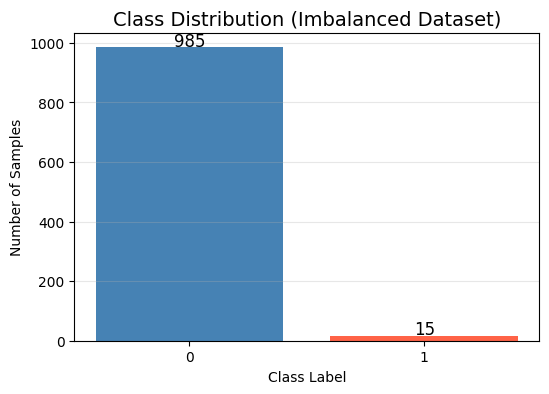

In [304]:
# Visualize the number of samples in each class (to show imbalance clearly)
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.keys(), class_distribution.values(), color=["steelblue", "tomato"])

plt.title("Class Distribution (Imbalanced Dataset)", fontsize=14)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(list(class_distribution.keys()))
plt.grid(axis='y', alpha=0.3)

for cls, count in class_distribution.items():
    plt.text(cls, count + 5, str(count), ha='center', fontsize=12)  # show count on bars

plt.show()

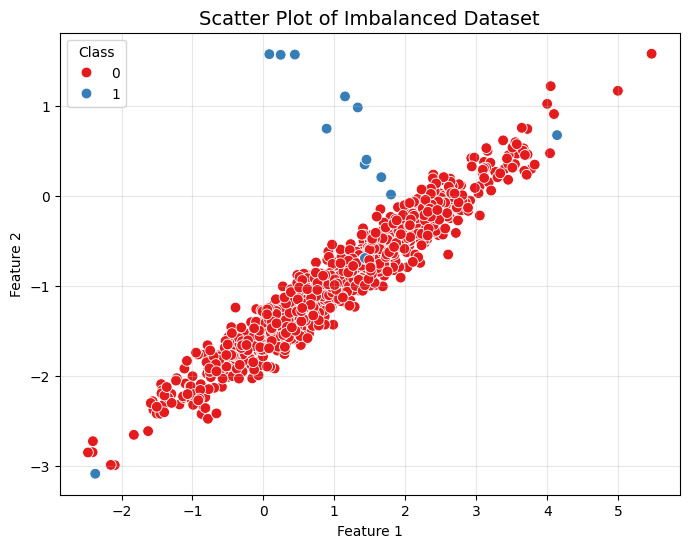

In [311]:
# Convert X (NumPy array) into a DataFrame for easier plotting
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Create a scatter plot to visualize class separation for the two features
# hue=y colors each point based on its class label
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Feature_1"],
    y=df["Feature_2"],
    hue=y,
    palette="Set1",
    s=60
)

plt.title("Scatter Plot of Imbalanced Dataset", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.grid(alpha=0.3)
plt.show()


In [325]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X  → feature matrix
# y  → target labels (imbalanced: majority + minority class)
#
# test_size = 0.25  → 25% of the dataset is reserved for evaluating model performance
# random_state = 0  → ensures the same split is produced every time (reproducibility)
#
# NOTE: Even with imbalanced datasets, random splitting is required before applying
# sampling techniques such as SMOTE or undersampling — otherwise information leakage
# from test data into training data may occur.
#
# After this split, balancing techniques (class weights / SMOTE / undersampling)
# should be applied ONLY on X_train and y_train — never on the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [326]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Define hyperparameter options to search during hyperparameter tuning
# These values will be passed to GridSearchCV or RandomizedSearchCV

# Type of regularization applied to the model to reduce overfitting
#  l1         → Lasso regularization (can shrink coefficients to zero → feature selection)
#  l2         → Ridge regularization (most commonly used and stable)
#  elasticnet → Combination of L1 + L2 penalties
penalty = ['l1', 'l2', 'elasticnet']

# Regularization strength values (inverse of λ)
# Higher C  → weaker regularization (model fits more to training data)
# Lower C   → stronger regularization (prevents overfitting)
c_values = [100, 10, 1.0, 0.1, 0.01]

# Optimization solvers used by Logistic Regression
# Each solver supports different penalty types:
#  - newton-cg, lbfgs, sag  → support only 'l2'
#  - liblinear              → supports 'l1' and 'l2'
#  - saga                   → supports 'l1', 'l2', and 'elasticnet'
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Class weights specify how strongly the model should penalize mistakes on each class
# Increasing the weight of class 1 forces the model to pay more attention to the minority class
# The list comprehension produces combinations like:
# {0:1,1:1}, {0:1,1:10}, {0:1,1:50}, {0:1,1:100}, {0:10,1:1}, {0:10,1:10}, ...
class_weight = [{0: w, 1: y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

# Combine all hyperparameters into a dictionary format required by search CV methods
# During hyperparameter tuning, the search algorithm will test different combinations of:
# (penalty × C × solver × class_weight)
param_dist = dict(penalty=penalty, C=c_values, solver=solvers, class_weight=class_weight)


In [327]:
param_dist

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [328]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# StratifiedKFold ensures that each fold used in cross-validation maintains
# the same proportion of class labels as the original dataset
# (very important for imbalanced classification problems)
cv = StratifiedKFold()

# Perform Grid Search to find the best hyperparameters for Logistic Regression
# estimator   → model to tune (log_reg)
# param_dist  → dictionary of hyperparameter combinations to be tested
# scoring='accuracy' → accuracy will be used as the evaluation metric
# cv=cv       → cross-validation strategy used to evaluate each parameter combination
grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_dist,   # hyperparameter dictionary for tuning
    scoring='accuracy',
    cv=cv
)


In [329]:
grid.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [330]:
# Display the best hyperparameter combination found by Grid Search
# best_params_ → returns the hyperparameters that achieved the highest accuracy during cross-validation
print("-" * 70)
print("🔍 Best Hyperparameters Found:")
print(grid.best_params_)
print("-" * 70)

# Display the best cross-validated accuracy score obtained during hyperparameter search
# best_score_ → average accuracy across all CV folds for the best parameter set
print("🏆 Best Cross-Validated Accuracy Score:")
print(grid.best_score_)
print("-" * 70)

# Display the complete model configured with the best hyperparameters
# best_estimator_ → Logistic Regression model using the optimal parameters discovered by Grid Search
print("🤖 Best Model (Estimator):")
print(grid.best_estimator_)
print("-" * 70)


----------------------------------------------------------------------
🔍 Best Hyperparameters Found:
{'C': 100, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
----------------------------------------------------------------------
🏆 Best Cross-Validated Accuracy Score:
0.992
----------------------------------------------------------------------
🤖 Best Model (Estimator):
LogisticRegression(C=100, class_weight={0: 1, 1: 10}, penalty='l1',
                   solver='liblinear')
----------------------------------------------------------------------


In [332]:
# Use the best model from Grid Search to generate predictions on unseen test data
# grid.predict() automatically uses the best estimator found during hyperparameter tuning
y_pred = grid.predict(X_test)

In [333]:
from sklearn.metrics import accuracy_score

print("\n" + "-" * 70)
print("📌 Accuracy Scores Summary")
print("-" * 70)

# Accuracy on training set (how well the tuned model fits learned data)
train_accuracy = accuracy_score(y_train, grid.predict(X_train))
print(f"🔹 Training Accuracy     : {train_accuracy:.4f}")

# Accuracy on testing set (generalization ability on unseen data)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Testing Accuracy      : {test_accuracy:.4f}")

# Best cross-validated accuracy during Grid Search
# This is the average accuracy across CV folds for the best hyperparameters
cv_best_accuracy = grid.best_score_
print(f"🔹 Best CV Accuracy      : {cv_best_accuracy:.4f}")

print("-" * 70)



----------------------------------------------------------------------
📌 Accuracy Scores Summary
----------------------------------------------------------------------
🔹 Training Accuracy     : 0.9920
🔹 Testing Accuracy      : 0.9960
🔹 Best CV Accuracy      : 0.9920
----------------------------------------------------------------------
